# Prac 03. Part 1

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

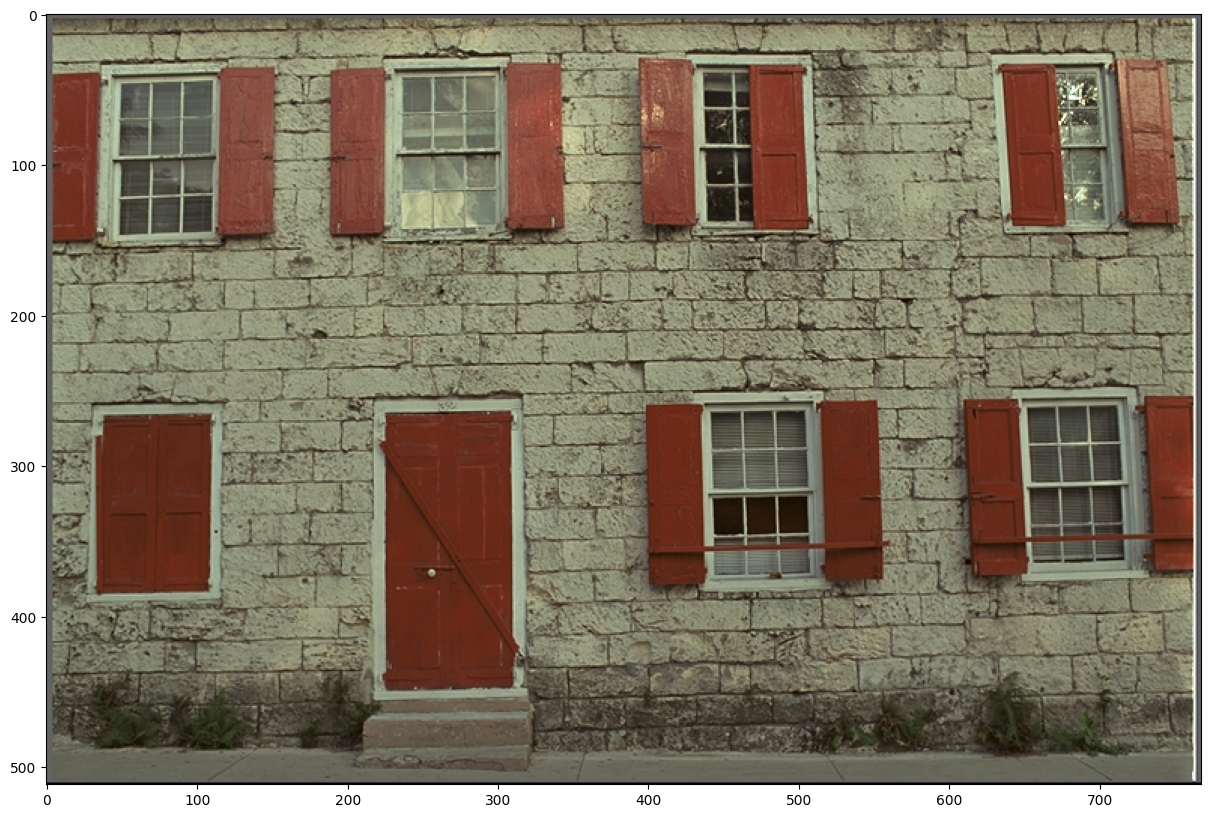

In [12]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
plt.imshow(img)

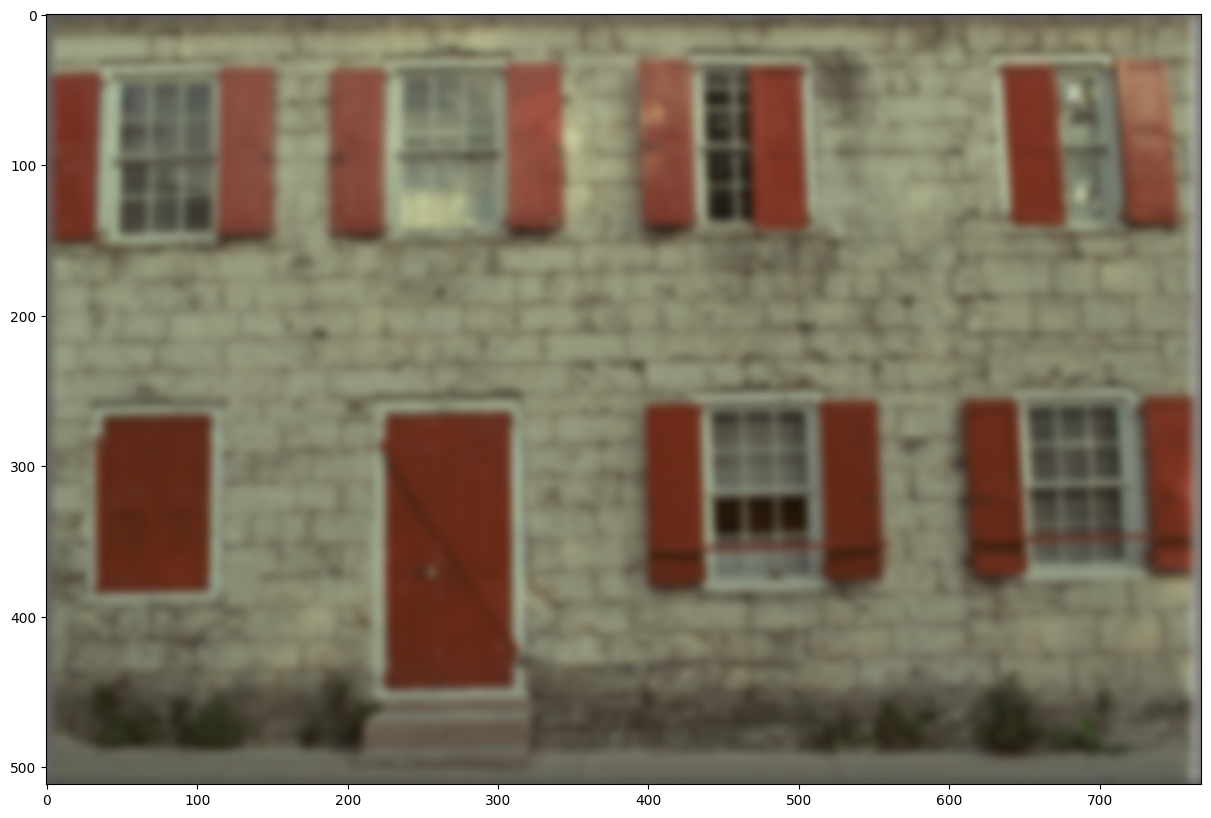

In [13]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (15, 15), 3)

plt.imshow(unsharp)

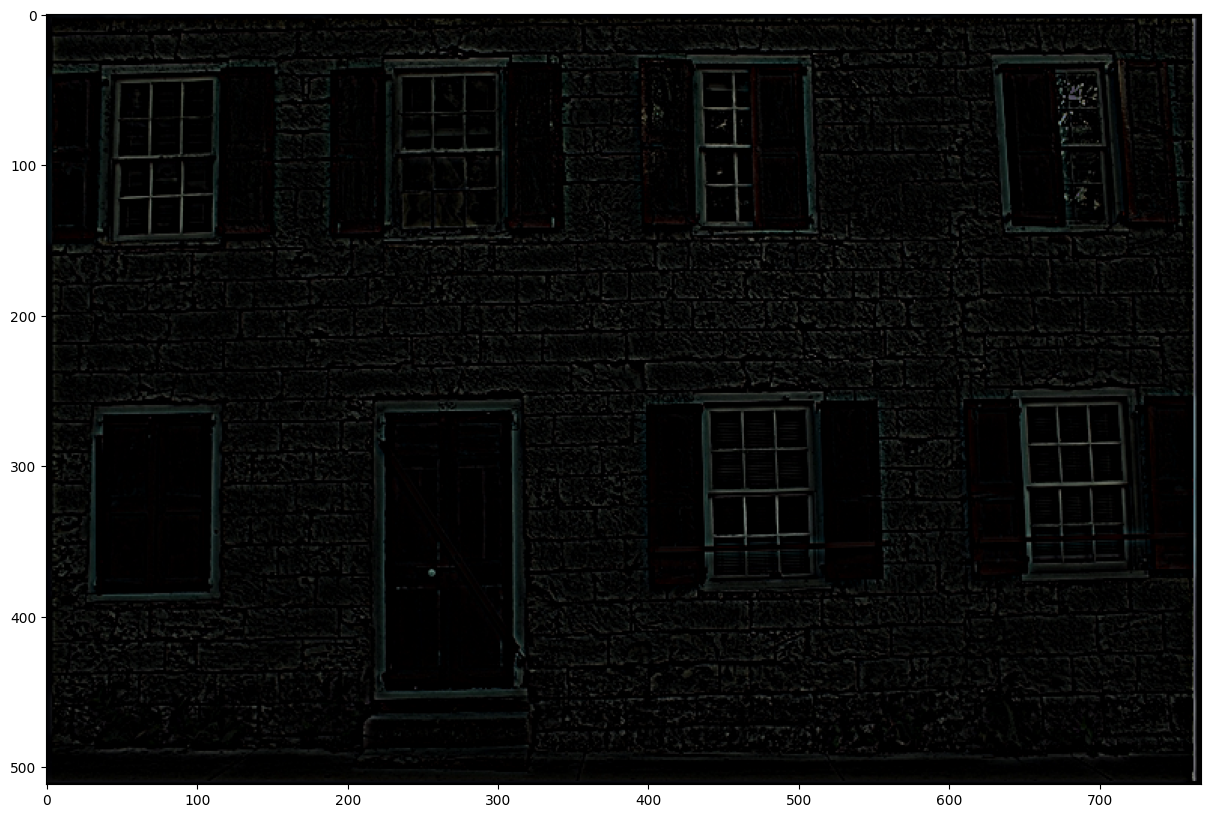

In [27]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = np.clip(img - unsharp, 0, 1)
plt.imshow(diff)

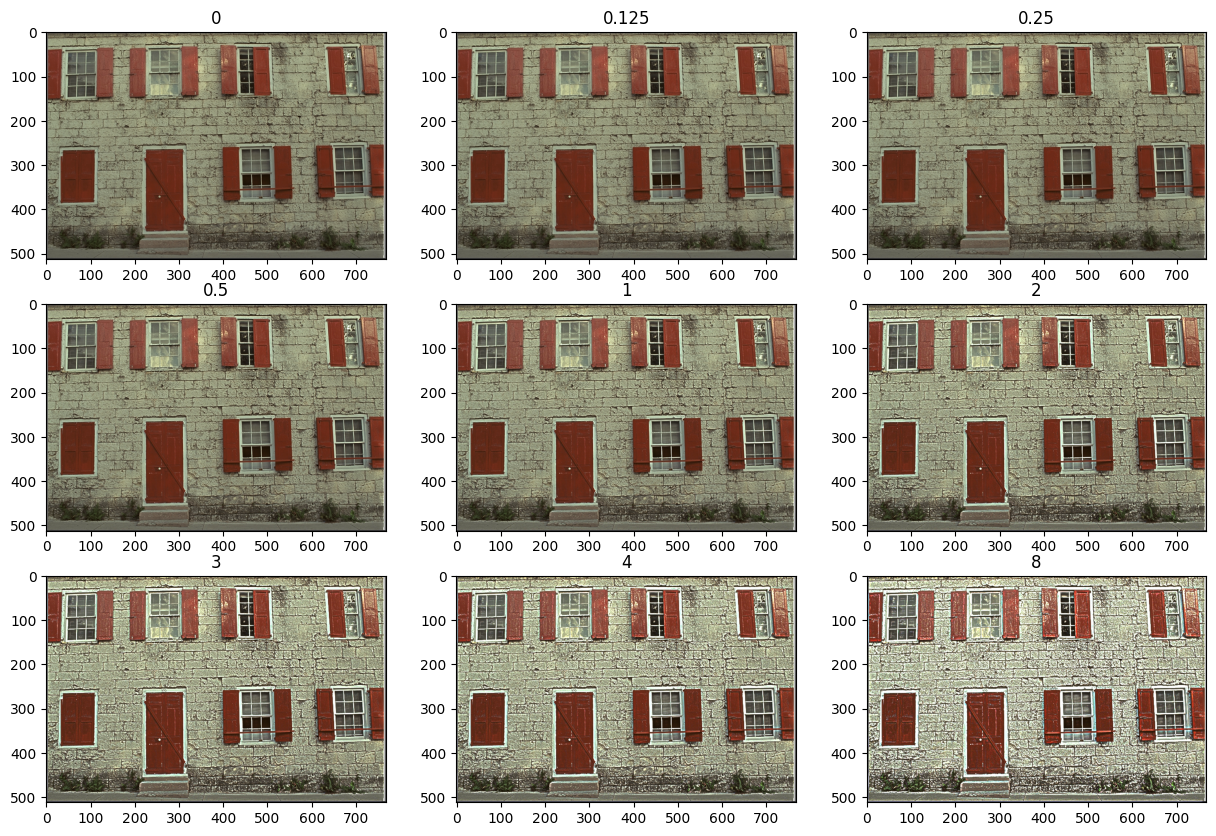

In [37]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

amount_arr = [0, 0.125, 0.25, 0.5, 1, 2, 3, 4, 8]

fig, ax = plt.subplots(nrows=3, ncols=3)

for i in range(len(amount_arr)):
    sharpened = np.clip(img + diff * amount_arr[i], 0, 1)
    x = i % 3
    y = i // 3
    AX = ax[y, x]
    AX.imshow(sharpened)
    AX.set_title(amount_arr[i])
    

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?